## Getting Started

This notebook will show how to set up `SIMBA`, load in a `LAURA` object and settings for tracking, and show how to plot the results.

It is assumed that a `LAURA` lattice directory and a `SimCodes` directory have been prepared and set with environment variables (see the docs [here](https://simba-accelerator.readthedocs.io/en/latest/SimCodes.html)). 

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import simba.Framework as fw  # noqa E402
from simba.Framework import load_directory  # noqa E402
import simba.Modules.Beams as rbf  # noqa E402
import simba.Modules.Twiss as rtf  # noqa E402

# Define a new framework instance, in directory 'getting_started'.
#       "clean" will empty (delete everything!) in the directory if true
#       "verbose" will print a progressbar if true
framework = fw.Framework(
        simcodes=os.environ["SIMCODES"],
        directory="./getting_started",
        master_lattice=os.environ["LATTICE_LOCATION"],
        generator_defaults="clara.yaml",
        clean=False,
        verbose=False
    )

scaling = 4

### Preparing the simulation and tracking

Load a lattice definition file from ``LATTICE_LOCATION``.

In [3]:
framework.loadSettings("Lattices/clara400_v13_combined.def")
startline = "generator"
endline = "Linac"

Change all lattice codes to ASTRA/Elegant/GPT/Ocelot with exclusions (injector can only be done in ASTRA/GPT).

In [4]:
framework.change_Lattice_Code("All", "elegant", exclude=["injector400"])

# Individual lattice lines defined in the settings file can also be changed,
# i.e. framework.change_Lattice_Code("VBC", "elegant")

This is the code that generates the laser distribution (ASTRA or GPT)

In [5]:
framework.change_generator("ASTRA")

Load a starting laser distribution setting

In [6]:
framework.generator.load_defaults("clara_400_2ps_Gaussian")

Set the thermal emittance for the generator

In [7]:
framework.generator.thermal_emittance = 0.0005

This is a scaling parameter. it defines the number of particles to create at the gun (this is "ASTRA generator" which creates distributions).
The space charge 3D mesh in ASTRA/GPT performs best if the number of particles is a power of 8.

In [8]:
framework.generator.number_of_particles = 2 ** (3 * scaling)

Modify some lattice parameters

In [9]:
framework["CLA-S02-MAG-QUAD-01"].k1l += 0.1
framework["CLA-L03-LIN-CAV-01"].phase += 5
framework["bunch_compressor"].set_angle(0.090)

Generate and track the bunch 

In [14]:
framework.track(startfile=startline, endfile=endline)

The outputs from the simulation can now be loaded as follows, and we can plot the beam evolution along the line

In [13]:
fwdir = load_directory("./getting_started", beams=True)

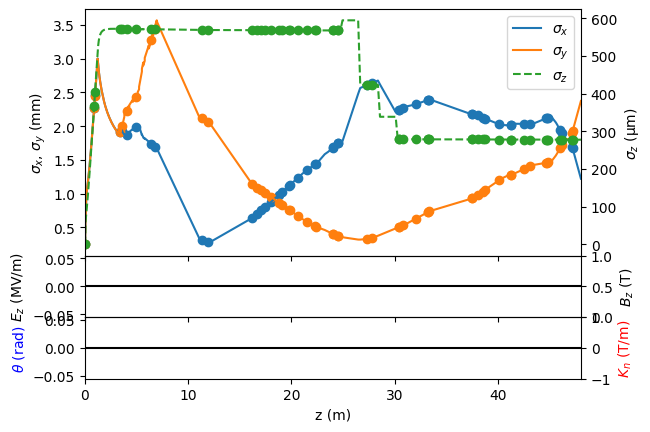

In [12]:
plt1, fig1, ax1 = fwdir.plot(include_layout=False, include_particles=True, ykeys=['sigma_x', 'sigma_y'], ykeys2=['sigma_z'])

In [16]:
import shutil
shutil.rmtree('./getting_started/')